## 必要なパッケージのインポート

In [46]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
import torch.nn.functional as F
from torch import optim
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## データセットの読み込み

In [47]:
iris = load_iris()
data = iris.data  # data
label = iris.target  # labels
label_names = iris.target_names

## データセットの中身を確認

In [48]:
# データセットのデータを確認
print('+++ iris data +++')
print(data)

# データセットの正解ラベルを確認
print('+++ iris label +++')
print(label)

# データセットの正解ラベルの名前を確認
print('+++ iris label names +++')
print(label_names)

+++ iris data +++
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5

## データセットを学習データとテストデータに分割

In [49]:
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.2)

print("train_data size: {}".format(len(train_data)))
print("test_data_size: {}".format(len(test_data)))
print("train_label size: {}".format(len(train_label)))
print("test_label size: {}".format(len(test_label)))

train_data size: 120
test_data_size: 30
train_label size: 120
test_label size: 30


## 学習用データセットとテスト用データセットを作成

In [50]:
# numpy配列(ndarray)をTensorに変換
train_x = torch.tensor(train_data, dtype=torch.float32)
test_x = torch.tensor(test_data, dtype=torch.float32)
train_y = torch.tensor(train_label, dtype=torch.int64)
test_y = torch.tensor(test_label, dtype=torch.int64)

# 学習用データセットとテスト用データセットを作成
train_dataset = TensorDataset(train_x, train_y)
test_dataset = TensorDataset(test_x, test_y)

# バッチサイズ分ずつデータを読み出すData Loaderを作成
train_batch = DataLoader(
    dataset=train_dataset,
    batch_size=5,
    shuffle=True,
    num_workers=1)

## パラメータの定義

In [51]:
D_in = 4
H = 16
D_out = 3
epoch = 100

## ネットワークの構築

In [52]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, H)
        self.linear3 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        return x

## CPUを使用するかGPUを使用するかの指定と確認

In [53]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = Net(D_in, H, D_out).to(device)

print("Device: {}".format(device))

Device: cuda


## 損失関数と最適化関数の定義

In [54]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

## ネットワーク構造の確認

In [55]:
print(net)

Net(
  (linear1): Linear(in_features=4, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=16, bias=True)
  (linear3): Linear(in_features=16, out_features=3, bias=True)
)


# loss(損失)とaccuracy(正解率)を保存するための空リストを作成

In [56]:
train_loss_list = []
train_accuracy_list = []

## ニューラルネットワークを学習モードに設定

In [57]:
net.train()

Net(
  (linear1): Linear(in_features=4, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=16, bias=True)
  (linear3): Linear(in_features=16, out_features=3, bias=True)
)

## 学習

In [58]:
for i in range(epoch):
    print('-------------------------------------------------------')
    print("Epoch: {}/{}".format(i+1, epoch))

    train_loss = 0
    train_accuracy = 0

    for data, label in train_batch:
        data = data.to(device)
        label = label.to(device)

        # 勾配を初期化
        optimizer.zero_grad()
        # データを入力して出力データを求める（順伝播）
        y_pred_prob = net(data)
        # 損失の計算
        loss = criterion(y_pred_prob, label)
        # 逆伝播により勾配を計算
        loss.backward()
        # すべての重みの値を更新
        optimizer.step()
        # 1バッチ毎の損失を加算
        train_loss += loss.item()

        # 正解ラベルをy_pred_probの値から予測
        y_pred_label = torch.max(y_pred_prob, 1)[1]
        # 1バッチ毎に予測したラベルが正解である数をカウント
        train_accuracy += torch.sum(y_pred_label == label).item() / len(label)

    # バッチ毎の平均の損失と正解率を計算
    batch_train_loss = train_loss / len(train_batch)
    batch_train_accuracy = train_accuracy / len(train_batch)

    # 1エポックごとの損失と正解率を表示
    print("Train Loss: {:.4f} Train Accuracy: {:.4f}".format(batch_train_loss, batch_train_accuracy))
    # lossとaccuracyをリスト化して保存
    train_loss_list.append(batch_train_loss)
    train_accuracy_list.append(batch_train_accuracy)

-------------------------------------------------------
Epoch: 1/100
Train Loss: 1.0330 Train Accuracy: 0.6083
-------------------------------------------------------
Epoch: 2/100
Train Loss: 0.9325 Train Accuracy: 0.6667
-------------------------------------------------------
Epoch: 3/100
Train Loss: 0.8467 Train Accuracy: 0.6667
-------------------------------------------------------
Epoch: 4/100
Train Loss: 0.7890 Train Accuracy: 0.6667
-------------------------------------------------------
Epoch: 5/100
Train Loss: 0.7412 Train Accuracy: 0.6667
-------------------------------------------------------
Epoch: 6/100
Train Loss: 0.7022 Train Accuracy: 0.6667
-------------------------------------------------------
Epoch: 7/100
Train Loss: 0.6730 Train Accuracy: 0.6667
-------------------------------------------------------
Epoch: 8/100
Train Loss: 0.6486 Train Accuracy: 0.6667
-------------------------------------------------------
Epoch: 9/100
Train Loss: 0.6240 Train Accuracy: 0.6667
-

## 実行結果の表示

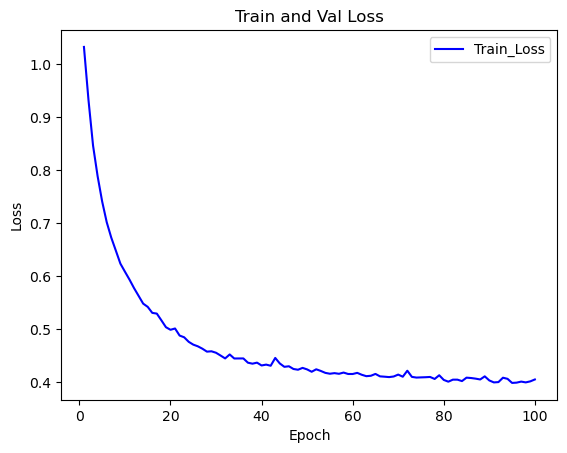

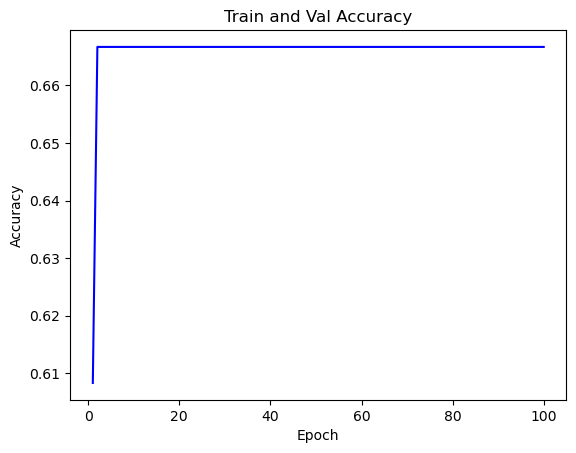

In [59]:
# 損失
plt.figure()
plt.title('Train and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, epoch+1), train_loss_list, color='blue', linestyle="-", label='Train_Loss')
plt.legend()

# 正解率
plt.figure()
plt.title('Train and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(range(1, epoch+1), train_accuracy_list, color='blue', linestyle='-', label='Train_Accuracy')

#表示
plt.show()

## テストの実施

In [60]:
# ニューラルネットワークを評価モードに設定
net.eval()

count = 0
for i in range(len(test_data)):
    data = torch.tensor(test_data[i], dtype=torch.float32)
    label = torch.tensor(test_label[i], dtype=torch.int64)

    data = data.to(device)
    label = label.to(device)

    y_pred_prob = net(data)

    y_pred_prob = y_pred_prob.cpu().detach().numpy()

    max_value = max(y_pred_prob)

    for j in range(len(y_pred_prob)):
        if y_pred_prob[j] == max_value:
            prediction_index = j
    print(f"test {i} : prediction : {prediction_index} ground_truth : {label}")

    if prediction_index == label:
        count += 1
print(f"accuracy : {count / len(test_data) * 100} %")

test 0 : prediction : 0 ground_truth : 0
test 1 : prediction : 0 ground_truth : 0
test 2 : prediction : 2 ground_truth : 2
test 3 : prediction : 0 ground_truth : 0
test 4 : prediction : 2 ground_truth : 2
test 5 : prediction : 2 ground_truth : 1
test 6 : prediction : 2 ground_truth : 2
test 7 : prediction : 2 ground_truth : 1
test 8 : prediction : 2 ground_truth : 1
test 9 : prediction : 0 ground_truth : 0
test 10 : prediction : 2 ground_truth : 2
test 11 : prediction : 2 ground_truth : 2
test 12 : prediction : 2 ground_truth : 1
test 13 : prediction : 2 ground_truth : 1
test 14 : prediction : 2 ground_truth : 2
test 15 : prediction : 2 ground_truth : 1
test 16 : prediction : 2 ground_truth : 2
test 17 : prediction : 2 ground_truth : 2
test 18 : prediction : 0 ground_truth : 0
test 19 : prediction : 2 ground_truth : 1
test 20 : prediction : 0 ground_truth : 0
test 21 : prediction : 2 ground_truth : 2
test 22 : prediction : 2 ground_truth : 2
test 23 : prediction : 2 ground_truth : 1
te